In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
!pip install shap

In [4]:
import shap
shap.initjs()

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Customer-Churn-Records.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
dataset.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
8294,8295,15569430,Burrows,704,Spain,Female,36,2,175509.80,2,1,0,152039.67,0,0,3,PLATINUM,397
1147,1148,15671209,Holden,593,Germany,Female,29,5,101713.84,3,1,0,134594.99,0,0,2,GOLD,490
2059,2060,15668081,Capon,581,Spain,Female,50,4,0.00,2,1,1,80701.72,0,0,3,GOLD,232
4748,4749,15759067,Bromby,537,Germany,Female,37,7,158411.95,4,1,1,117690.58,1,1,3,DIAMOND,888
8790,8791,15691792,Young,416,Spain,Male,35,8,0.00,1,0,0,119712.78,0,0,2,DIAMOND,244
8567,8568,15587676,Alexeieva,699,France,Male,30,9,0.00,1,1,1,108162.13,0,0,4,DIAMOND,239
9694,9695,15659710,Lascelles,581,France,Male,25,5,77886.53,2,1,0,150319.49,0,0,4,PLATINUM,243
734,735,15612966,Milani,545,Germany,Female,60,7,128981.07,1,0,1,176924.21,1,1,5,GOLD,907
5793,5794,15784890,McKenzie,763,Spain,Female,32,8,0.00,2,1,0,16725.53,0,0,4,GOLD,490
5876,5877,15585379,Humphries,704,France,Male,39,2,111525.02,1,1,0,199484.96,0,0,4,SILVER,368


In [8]:
len(dataset)

10000

In [9]:
dataset.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
0              464  
1              456  
2              377  
3              350  
4              425  
...            ...  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911  

[10000 rows x 18 columns]>

In [10]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [11]:
missing_vals = dataset.isnull().sum()
missing_vals

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [12]:
dataset.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
dataset.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [14]:
dataset = dataset.dropna()

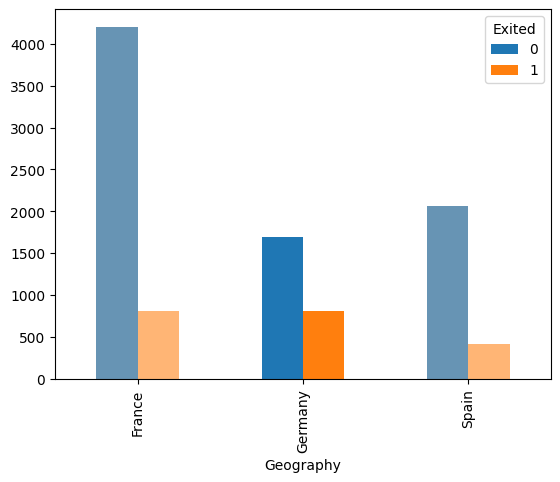

In [15]:
ax = dataset.groupby(['Geography', 'Exited']).Exited.count().unstack().plot(kind='bar')

bars = ax.patches

bars[0].set_facecolor('#6794b4')
bars[2].set_facecolor('#6794b4')

bars[3].set_facecolor('#ffb575')
bars[5].set_facecolor('#ffb575')

<Axes: xlabel='Gender'>

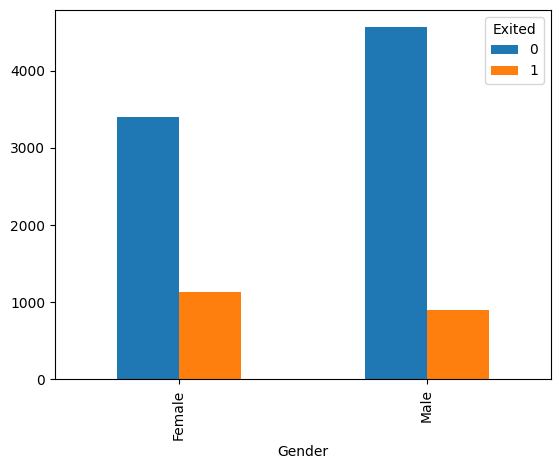

In [16]:
dataset.groupby(['Gender','Exited']).Exited.count().unstack().plot(kind='bar')

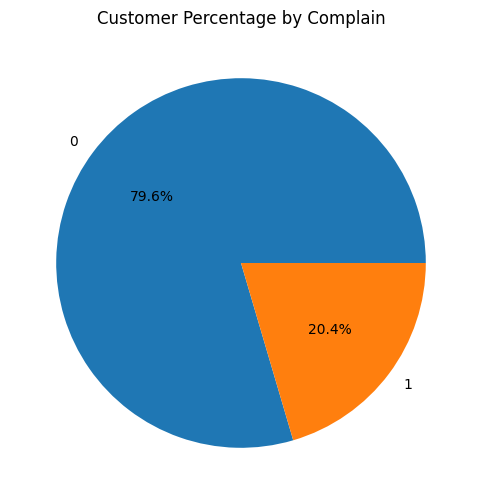

In [17]:
cmplt_cust = dataset.groupby(['Complain']).size()
plt.figure(figsize= (8,6))
plt.pie(cmplt_cust, labels = cmplt_cust.index,autopct='%1.1f%%')
plt.title('Customer Percentage by Complain')
plt.plot()
plt.show()

CreditScore    Axes(0.125,0.11;0.775x0.77)
dtype: object

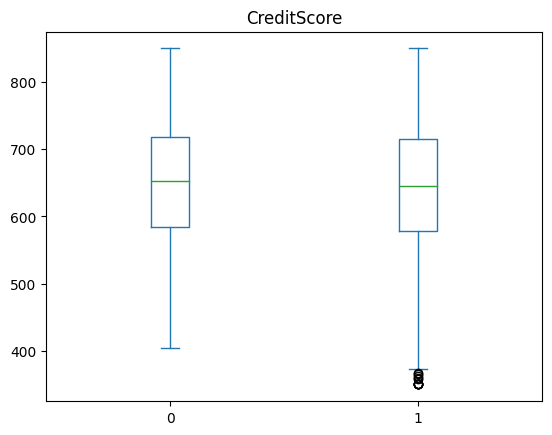

In [18]:
dataset.plot(kind='box', by='Exited', column='CreditScore')

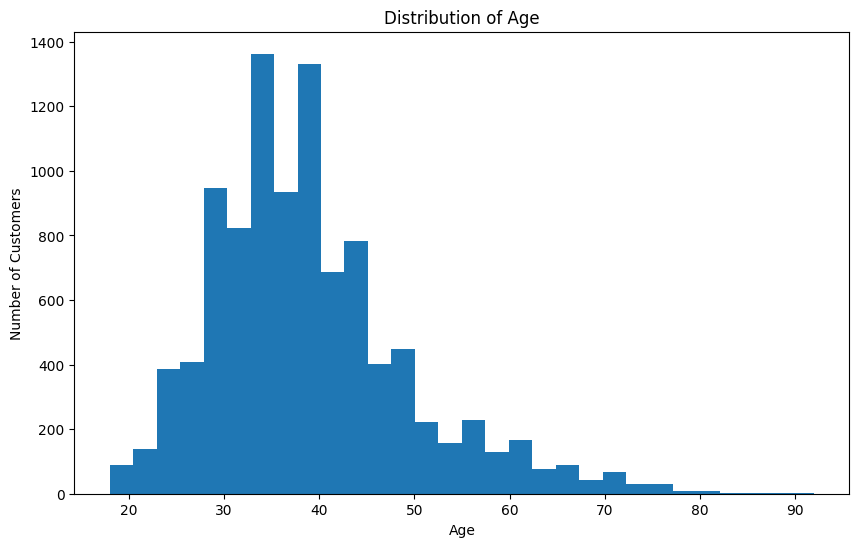

In [19]:
plt.figure(figsize =(10,6))
plt.hist(dataset['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age')
plt.show()

<Axes: xlabel='NumOfProducts'>

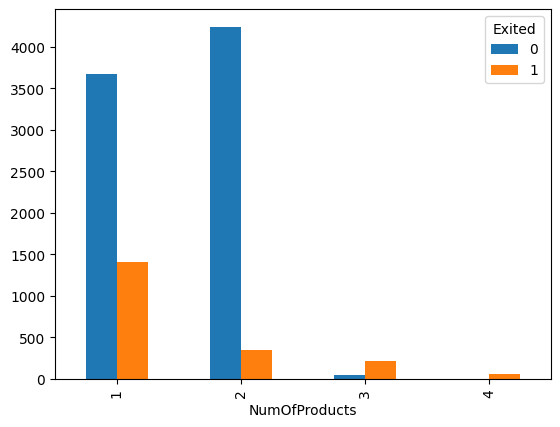

In [20]:
dataset.groupby(['NumOfProducts','Exited']).Exited.count().unstack().plot(kind='bar')

Balance    Axes(0.125,0.11;0.775x0.77)
dtype: object

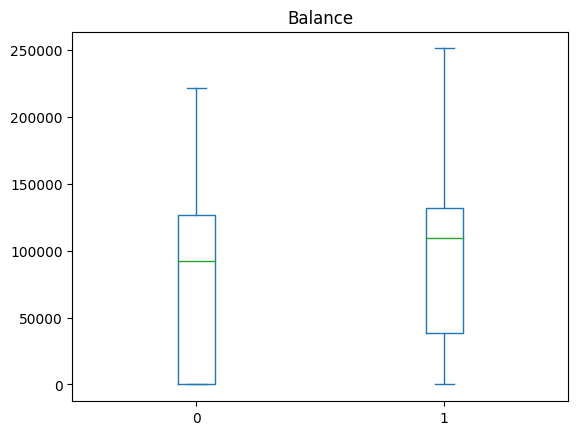

In [21]:
dataset.plot(kind='box', by='Exited', column='Balance')

Satisfaction Score    Axes(0.125,0.11;0.775x0.77)
dtype: object

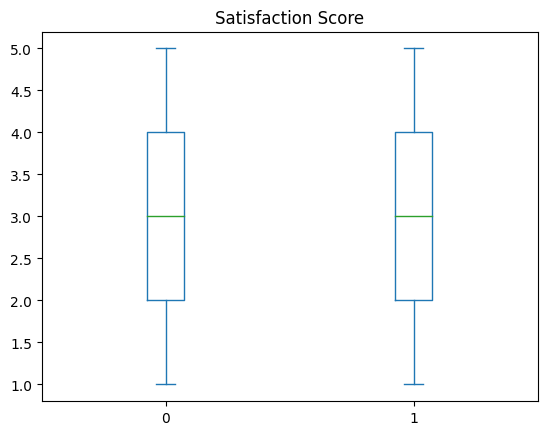

In [22]:
dataset.plot(kind='box', by='Exited', column='Satisfaction Score')

<Axes: xlabel='Exited'>

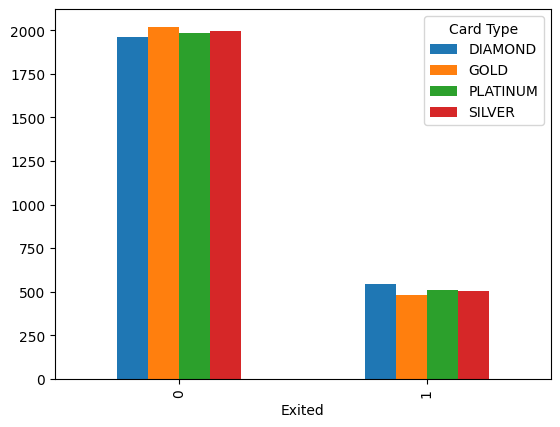

In [23]:
dataset.groupby(['Exited','Card Type']).Exited.count().unstack().plot(kind='bar')

In [24]:
le = LabelEncoder()
for column in dataset.select_dtypes(include=['object']).columns:
    dataset[column] = le.fit_transform(dataset[column])

In [25]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


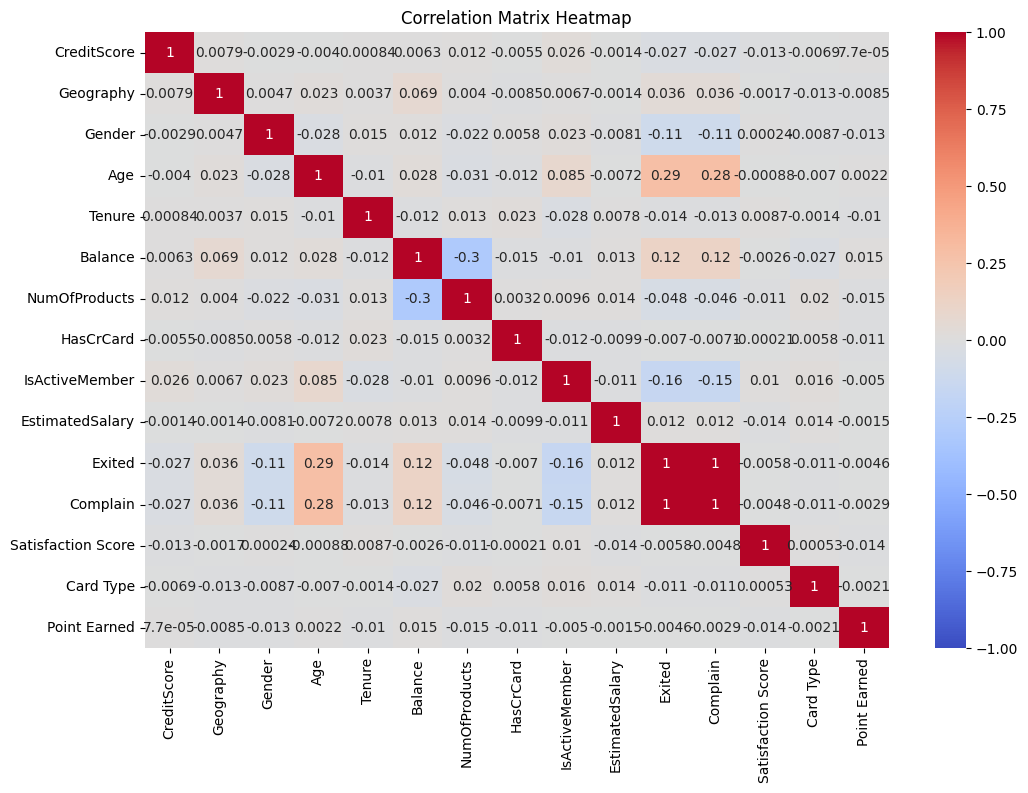

In [26]:
corr_matrix = dataset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
target_column = 'Exited'

In [28]:
X = dataset.drop(target_column, axis=1)
y = dataset[target_column]

In [64]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1,0,300
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,5,2,771
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,3,3,564
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2,1,339


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 69)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred = rf.predict(X_test)

In [72]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [74]:
rf_accuracy = accuracy_score(y_test, y_pred)
# Calculate Precision
precision = precision_score(y_test, y_pred)
# Calculate Recall
recall = recall_score(y_test, y_pred)
# Calculate F1-score
f1 = f1_score(y_test, y_pred)

In [75]:
print("Accuracy score:",rf_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy score: 0.9985
Precision: 0.997624703087886
Recall: 0.995260663507109
F1-score: 0.9964412811387899


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3190
           1       1.00      1.00      1.00       810

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



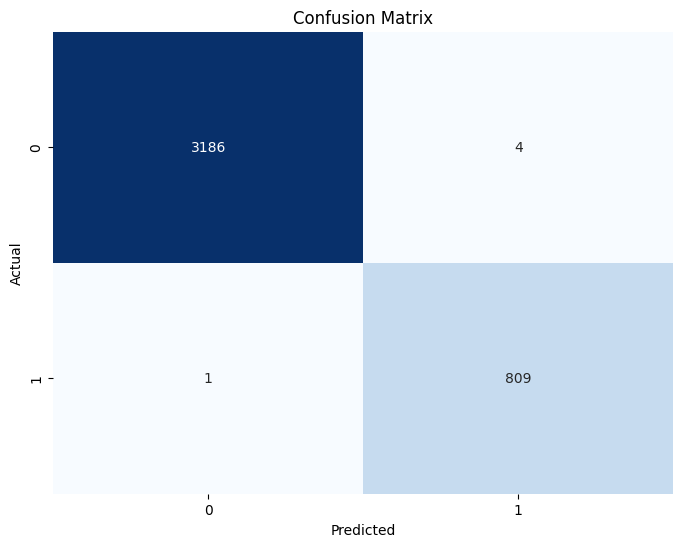

In [36]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [77]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [78]:
y_train

7637    0
1475    0
6540    0
6164    0
1353    0
       ..
4374    0
8631    0
9818    0
4041    0
7371    0
Name: Exited, Length: 8000, dtype: int64

In [79]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

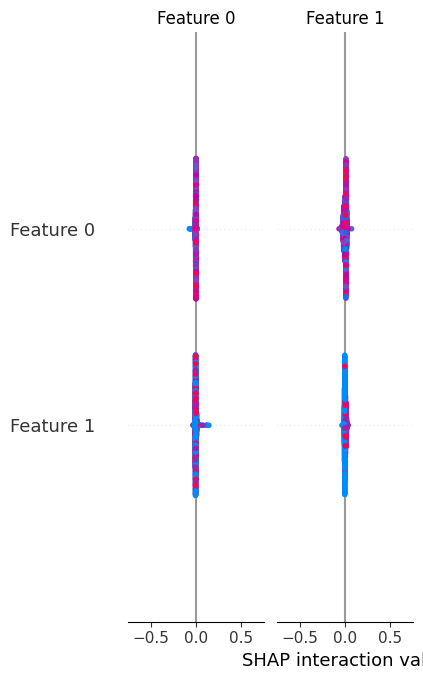

In [80]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)